In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_excel("Merged_Dataset.xlsx")
df

,Unnamed: 0,Postal Abbr.,State,Year,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Disposable personal income,Gross domestic product (GDP),...,Total violent robbery,No. of persons 25 and over (in thou) Total,No. of persons 25 and over (in thou) Male,No. of persons 25 and over (in thou) Female,Percentage with high school completion or higher (%) total,Percentage with high school completion or higher (%) Male,Percentage with high school completion or higher (%) Female,Percentage with bachelor's or higher degree (%) total,Percentage with bachelor's or higher degree (%) Male,Percentage with bachelor's or higher degree (%) Female
0,0,AL,Alabama,2013,2172102,2012828,159274,7.3,159063.1,194786.9,...,4648,3226,1525,1701,84.9,84.0,85.7,23.5,23.4,23.5
1,1,AL,Alabama,2014,2164715,2018705,146010,6.7,164562.8,197406.9,...,4701,3259,1536,1723,84.6,83.7,85.5,23.0,22.7,23.3
2,2,AL,Alabama,2015,2152295,2020443,131852,6.1,171157.0,202372.4,...,4611,3283,1550,1733,85.1,84.1,86.1,24.0,23.7,24.3
3,3,AL,Alabama,2016,2155729,2029157,126572,5.9,173653.1,207368.4,...,4686,3300,1558,1742,84.9,83.3,86.3,24.7,24.5,24.9
4,4,AL,Alabama,2017,2203458,2103873,99585,4.5,180348.3,214606.3,...,4217,3314,1569,1745,86.0,85.0,86.9,25.6,24.7,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,352,WY,Wyoming,2015,301608,288894,12714,4.2,30239.2,38426.9,...,59,388,191,197,93.2,93.2,93.1,26.9,26.6,27.1
353,353,WY,Wyoming,2016,300546,284439,16107,5.4,28807.8,35879.0,...,59,391,199,192,93.2,93.0,93.5,26.5,25.5,27.6
354,354,WY,Wyoming,2017,293802,281164,12638,4.3,29625.5,36980.7,...,76,389,198,190,93.1,92.7,93.4,27.6,25.9,29.3
355,355,WY,Wyoming,2018,292629,280754,11875,4.1,31548.4,39171.7,...,100,394,200,194,92.7,92.5,93.0,27.0,25.6,28.4


In [2]:
'''
Bin data based on unemployment rate(Quantitative data)
We label the bins according to 5 levels of unemployment rate:
extremely low, very low, low, medium, high, very high, extremely high
'''
df1=df[df['Year']==2019]
df1['Unemployment_level']=pd.cut(df1['Unemployment_rate'],bins=7, 
labels=['extremely low','very low', 'low', 'medium', 'high', 'very high','extremely high'])
unemployment_rate_binned=df1.groupby(['Unemployment_level'])

'''Calculate aggregate summary: 
2013-2019
the average unemployment rate and rates of all crime types
in different states in the US 
'''
binned_crime=unemployment_rate_binned[df1.columns[24:33]].agg(['min','mean','max','median'])
binned_crime

/var/folders/wg/z0j6n1b91m392y89y39whk3r0000gn/T/ipykernel_5643/3717168736.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Unemployment_level']=pd.cut(df1['Unemployment_rate'],bins=7,


Rates of all crimes                                \
                                   min         mean     max   median   
Unemployment_level                                                     
extremely low                   1209.2  1924.220000  2841.2  1977.00   
very low                        1179.8  1920.790000  2940.3  1752.35   
low                             1335.7  2133.194118  2858.0  2193.20   
medium                          1373.3  2001.611111  2730.6  1897.40   
high                            1403.4  2325.750000  3162.0  2368.80   
very high                       1583.4  2378.866667  3112.7  2440.50   
extremely high                  2375.8  3217.900000  4367.1  2910.80   

                   Rates of burglary                             \
                                 min        mean    max  median   
Unemployment_level                                                
extremely low                  126.3  265.340000  377.2  276.70   
very low                       162.8  320.530000  671.7  272.20   
low                            180.7  333.176471  599.6  304.80   
medium                         141.9  338.266667  519.1  345.70   
high                           182.4  397.625000  579.0  414.55   
very high                      328.7  473.266667  696.8  394.30   
extremely high                 261.1  458.400000  627.0  487.10   

                   Rates of larceny               ... Rates of violent murder  \
                                min         mean  ...                     max   
Unemployment_level                                ...                           
extremely low                1017.3  1472.920000  ...                     3.4   
very low                      911.8  1401.900000  ...                     9.0   
low                          1034.7  1590.364706  ...                     9.3   
medium                       1121.3  1441.222222  ...                     6.6   
high                         1124.2  1726.225000  ...                    11.7   
very high                    1119.7  1635.133333  ...                     8.6   
extremely high               1555.7  2465.700000  ...                    23.5   

                          Rates of violent rape                           \
                   median                   min       mean    max median   
Unemployment_level                                                         
extremely low        2.40                  43.4  51.220000   57.3  54.00   
very low             2.25                  32.0  49.530000   72.6  46.55   
low                  4.90                  17.2  41.211765   77.2  41.20   
medium               4.60                  31.0  47.366667   72.4  42.20   
high                 4.90                  34.0  43.925000   49.0  46.35   
very high            5.00                  42.1  51.266667   61.4  50.30   
extremely high      11.20                  25.1  74.233333  148.7  48.90   

                   Rates of violent robbery                            
                                        min        mean    max median  
Unemployment_level                                                     
extremely low                          11.4   34.580000   79.9   23.5  
very low                                8.7   39.420000   64.0   41.1  
low                                    19.2   70.282353  152.2   75.0  
medium                                 11.6   74.500000  132.4   72.5  
high                                   67.6   76.500000   86.6   75.9  
very high                              21.1   73.600000  111.6   88.1  
extremely high                         57.1  184.800000  384.4  112.9  

[7 rows x 36 columns]

/var/folders/wg/z0j6n1b91m392y89y39whk3r0000gn/T/ipykernel_5643/2647604063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Unemployment_level']=pd.cut(df2['Unemployment_rate'],


[Text(0.5, 1.0, '2019 Binned unemployment level(mean) vs. Rates of all crimes')]

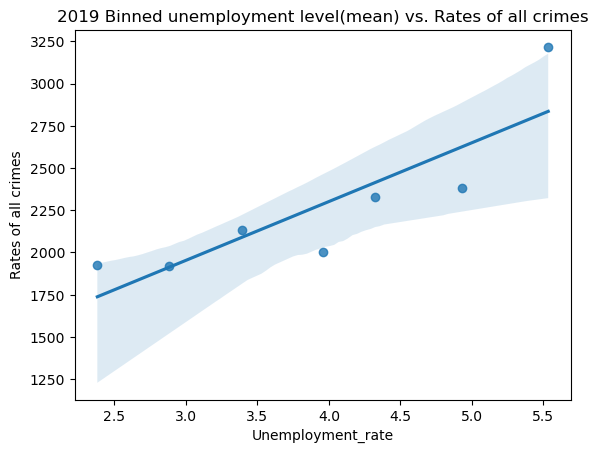

In [3]:
'''
Bin data based on unemployment rate(Quantitative data)
We label the bins according to 5 levels of unemployment rate:
extremely low, very low, low, medium, high, very high, extremely high
'''
df2=df[df['Year']==2019]
df2['Unemployment_level']=pd.cut(df2['Unemployment_rate'],
bins=7, labels=['extremely low','very low', 'low', 'medium', 'high', 'very high','extremely high'])
unemployment_rate_binned=df2.groupby(['Unemployment_level'])

'''Calculate aggregate summary: 
2013-2019
the average unemployment rate and rates of all crime types
in different states in the US 
'''
binned_crime=unemployment_rate_binned[df2.columns[7:33]].agg('mean')
sns.regplot(x='Unemployment_rate',y='Rates of all crimes',
            data=binned_crime).set(title='2019 Binned unemployment level(mean) vs. Rates of all crimes')

In [4]:
#Group data by State
state_stat=df.groupby('State')
'''
Calculate aggregate summary: 2013-2019 the average unemployment rate,% of education completion,
income and rates of all crime types in different states in the US 
'''
state_crime_summary=state_stat[df.columns[7:50]].agg(['min','max','mean','median'])
state_crime_summary.head(3)


Unemployment_rate                       Disposable personal income  \
                      min  max      mean median                        min   
State                                                                        
Alabama               3.2  7.3  5.371429    5.9                   159063.1   
Alaska                5.6  7.0  6.385714    6.5                    35601.4   
Arizona               4.8  7.8  5.828571    5.5                   219881.6   

                                           Gross domestic product (GDP)  \
              max           mean    median                          min   
State                                                                     
Alabama  196622.7  176250.642857  173653.1                     194786.9   
Alaska    41593.3   38802.242857   38714.9                      50727.7   
Arizona  305173.1  258123.914286  253015.4                     278591.6   

                   ...  \
              max  ...   
State              ...   
Alabama  231561.9  ...   
Alaska    57247.7  ...   
Arizona  372393.5  ...   

        Percentage with high school completion or higher (%)  Female         \
                                                                mean median   
State                                                                         
Alabama                                          86.642857             86.3   
Alaska                                           92.400000             92.3   
Arizona                                          87.171429             87.4   

        Percentage with bachelor's or higher degree (%)  total        \
                                                           min   max   
State                                                                  
Alabama                                               23.0      26.3   
Alaska                                                28.3      31.1   
Arizona                                               27.4      30.1   

                           \
              mean median   
State                       
Alabama  24.628571   24.7   
Alaska   29.442857   29.2   
Arizona  28.628571   28.7   

        Percentage with bachelor's or higher degree (%)  Male        \
                                                          min   max   
State                                                                 
Alabama                                               22.7     25.4   
Alaska                                                24.8     28.6   
Arizona                                               27.8     29.9   

                           
              mean median  
State                      
Alabama  24.114286   24.4  
Alaska   26.357143   26.4  
Arizona  28.871429   28.8  

[3 rows x 172 columns]

In [5]:
state_crime_avg=state_stat[df.columns[4:50]].mean()
state_crime_median=state_stat[df.columns[4:50]].median()
state_crime_avg.sort_values(by='Unemployment_rate',ascending=False,inplace=True)
state_crime_avg.head()

,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Disposable personal income,Gross domestic product (GDP),Implicit regional price deflator,Per capita disposable personal income,Per capita personal consumption expenditures (PCE),Per capita personal income,...,Total violent rape,Total violent robbery,No. of persons 25 and over (in thou) Total,No. of persons 25 and over (in thou) Male,No. of persons 25 and over (in thou) Female,Percentage with high school completion or higher (%) total,Percentage with high school completion or higher (%) Male,Percentage with high school completion or higher (%) Female,Percentage with bachelor's or higher degree (%) total,Percentage with bachelor's or higher degree (%) Male
State,,,,,,,,,,,,,,,,,,,,,
District of Columbia,3.894620e+05,3.636461e+05,25815.857143,6.642857,43923.942857,129309.257143,117.267429,65417.571429,64834.857143,77202.142857,...,447.428571,3221.142857,481.714286,226.000000,255.857143,90.585714,90.242857,90.914286,57.314286,58.071429
Alaska,3.602166e+05,3.371630e+05,23053.571429,6.385714,38802.242857,54125.785714,109.294286,52512.857143,46760.285714,57236.428571,...,970.000000,791.000000,475.571429,245.571429,229.857143,92.485714,92.585714,92.400000,29.442857,26.357143
Nevada,1.435296e+06,1.345555e+06,89741.428571,6.328571,120160.914286,154021.200000,103.598000,41147.142857,37262.000000,45877.857143,...,1796.571429,5107.571429,2009.142857,998.142857,1011.142857,86.142857,85.942857,86.300000,24.057143,23.914286
Mississippi,1.266881e+06,1.186844e+06,80036.714286,6.300000,99943.928571,107987.742857,92.780143,33524.428571,30159.000000,36422.285714,...,977.571429,2128.000000,1957.571429,921.571429,1036.142857,83.985714,82.014286,85.742857,21.600000,19.700000
New Mexico,9.419309e+05,8.843641e+05,57566.714286,6.114286,74804.414286,93222.200000,99.034000,35612.571429,33178.714286,39055.857143,...,1434.142857,2573.000000,1390.142857,676.571429,713.571429,85.085714,84.357143,85.785714,27.114286,26.000000


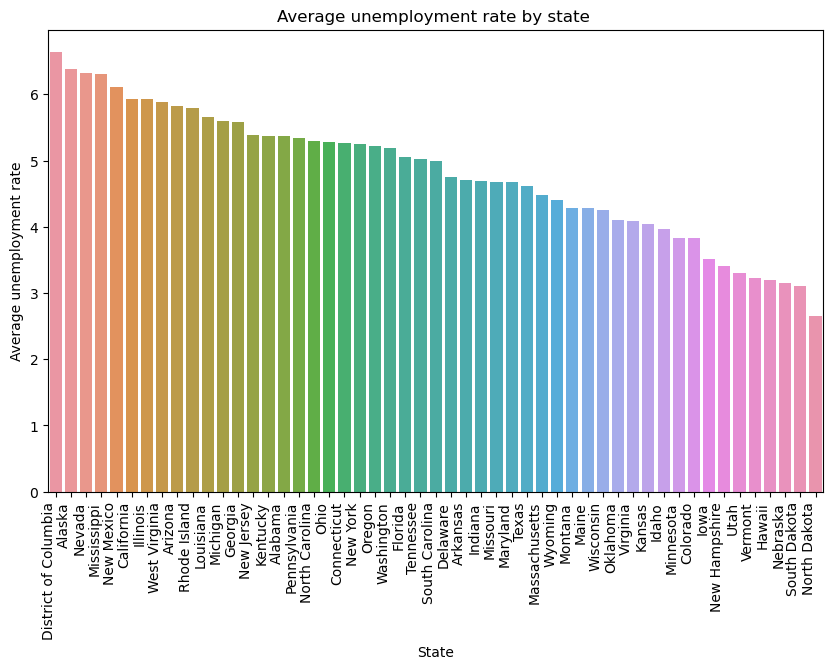

In [16]:
state_crime_avg=state_crime_avg.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Unemployment_rate', data=state_crime_avg)
plt.title("Average unemployment rate by state ")
plt.xlabel("State")
plt.ylabel("Average unemployment rate")
ax=plt.gca()
plt.xticks(rotation=90, ha='right')
plt.show()



[Text(0.5, 1.0, 'Rates of all crimes vs Average unemployment rates in States')]

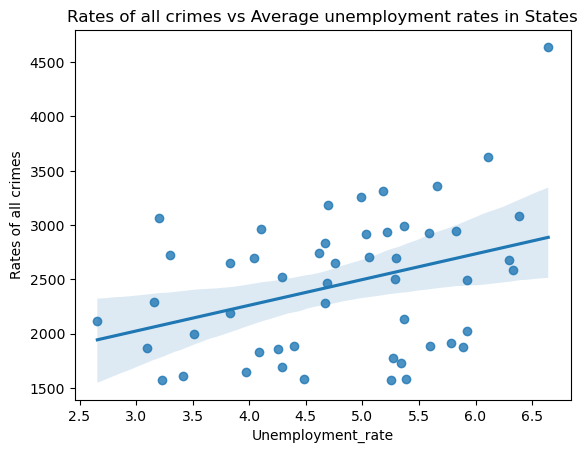

In [7]:
sns.regplot(x='Unemployment_rate',y='Rates of all crimes',
data=state_crime_avg).set(title='Rates of all crimes vs Average unemployment rates in States')

In [8]:
state_crime_median=state_stat[df.columns[4:50]].median()

[Text(0.5, 1.0, 'Rates of all crimes vs. Median disposable income')]

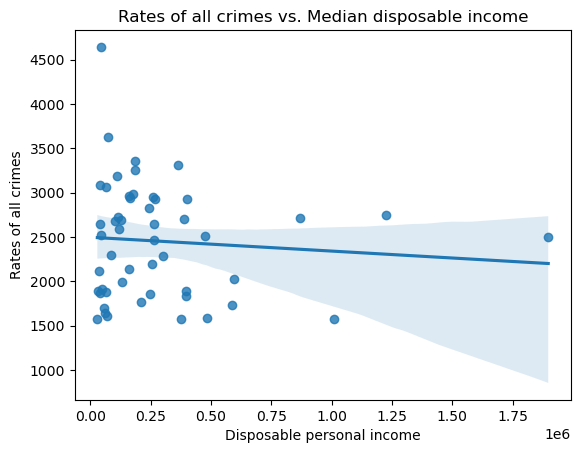

In [9]:
sns.regplot(x='Disposable personal income',y='Rates of all crimes',
            data=state_crime_avg).set(title='Rates of all crimes vs. Median disposable income')

[Text(0.5, 1.0, 'Rates of all crimes vs. Avg % of High school completion')]

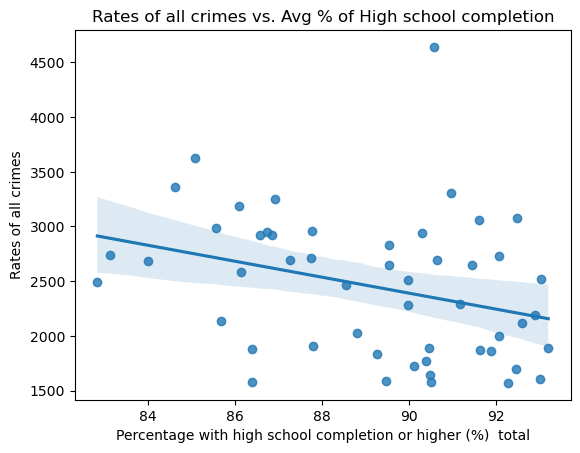

In [10]:
sns.regplot(x='Percentage with high school completion or higher (%)  total',y='Rates of all crimes',
            data=state_crime_avg).set(title='Rates of all crimes vs. Avg % of High school completion')

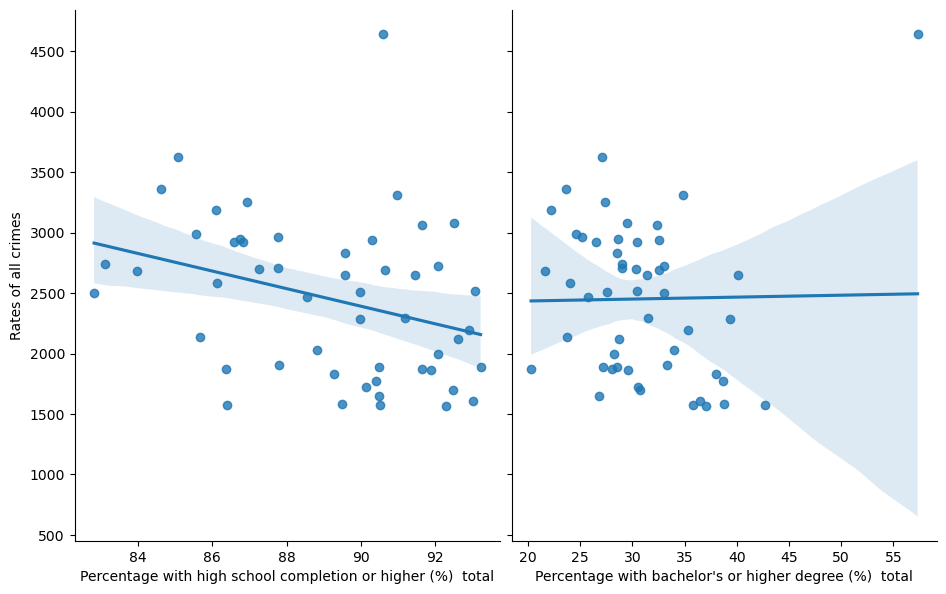

In [11]:
sns.pairplot(state_crime_avg, 
             x_vars=['Percentage with high school completion or higher (%)  total', 
                              "Percentage with bachelor's or higher degree (%)  total"], 
             y_vars='Rates of all crimes',
             height=6, aspect=.8, kind="reg")

In [12]:
#Group data by Year and State
year_stat=df.groupby(['Year','State'])
'''
Calculate aggregate summary: Unemployment rates,education attainment,income from 2013 to 2019 respectively 
and rates of all crime types in different states in the US 
'''
year_crime=year_stat[df.columns[7:50]].median()
year_crime.head()



Unemployment_rate  Disposable personal income  \
Year State                                                       
2013 Alabama                   7.3                    159063.1   
     Alaska                    7.0                     35601.4   
     Arizona                   7.8                    219881.6   
     Arkansas                  7.1                     98053.7   
     California                9.0                   1603552.4   

                 Gross domestic product (GDP)  \
Year State                                      
2013 Alabama                         194786.9   
     Alaska                           57247.7   
     Arizona                         278591.6   
     Arkansas                        113227.3   
     California                     2220389.9   

                 Implicit regional price deflator  \
Year State                                          
2013 Alabama                               92.163   
     Alaska                               104.034   
     Arizona                              100.101   
     Arkansas                              91.411   
     California                           109.726   

                 Per capita disposable personal income  \
Year State                                               
2013 Alabama                                   32699.0   
     Alaska                                    48237.0   
     Arizona                                   33502.0   
     Arkansas                                  33186.0   
     California                                41878.0   

                 Per capita personal consumption expenditures (PCE)  \
Year State                                                            
2013 Alabama                                               29609.0    
     Alaska                                                42963.0    
     Arizona                                               32907.0    
     Arkansas                                              28866.0    
     California                                            37687.0    

                 Per capita personal income  \
Year State                                    
2013 Alabama                        36014.0   
     Alaska                         52812.0   
     Arizona                        37139.0   
     Arkansas                       36677.0   
     California                     48502.0   

                 Personal consumption expenditures  Personal income  \
Year State                                                            
2013 Alabama                              144027.9         175185.3   
     Alaska                                31709.4          38978.0   
     Arizona                              215979.0         243752.3   
     Arkansas                              85290.2         108367.8   
     California                          1443067.6        1857200.9   

                  Real GDP  ...  Total violent rape  Total violent robbery  \
Year State                  ...                                              
2013 Alabama      191369.8  ...              2044.0                 4648.0   
     Alaska        55354.3  ...               922.0                  624.0   
     Arizona      273481.9  ...              3050.0                 6702.0   
     Arkansas     110752.4  ...              1423.0                 2258.0   
     California  2179229.0  ...              9714.0                53640.0   

                 No. of persons 25 and over (in thou)  Total  \
Year State                                                     
2013 Alabama                                          3226.0   
     Alaska                                            462.0   
     Arizona                                          4350.0   
     Arkansas                                         1962.0   
     California                                      25150.0   

                 No. of persons 25 and over (in thou)  Male  \
Year State                                    

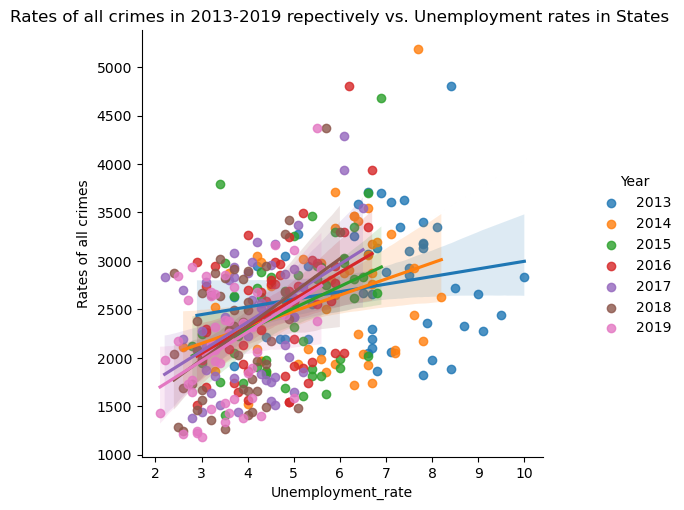

In [13]:
year_crime=year_crime.reset_index()
sns.lmplot(x='Unemployment_rate',y='Rates of all crimes',hue='Year',data=year_crime,
fit_reg=True).set(title='Rates of all crimes in 2013-2019 repectively vs. Unemployment rates in States ')
#3 attributes: Unemployment rate, year, Rates of all crimes

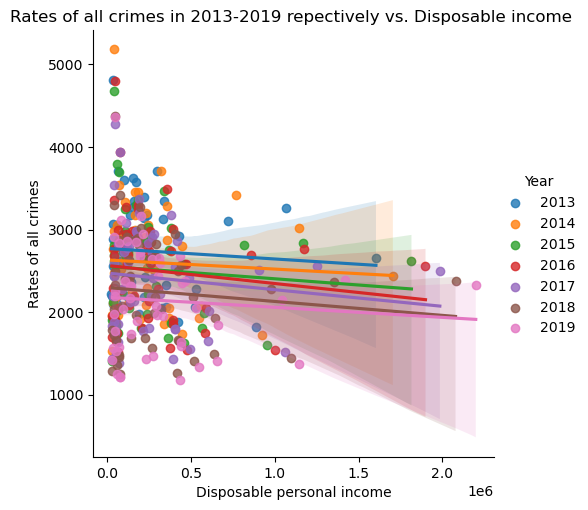

In [14]:
sns.lmplot(x='Disposable personal income',y='Rates of all crimes',hue='Year',data=year_crime,
           fit_reg=True).set(title='Rates of all crimes in 2013-2019 repectively vs. Disposable income ')

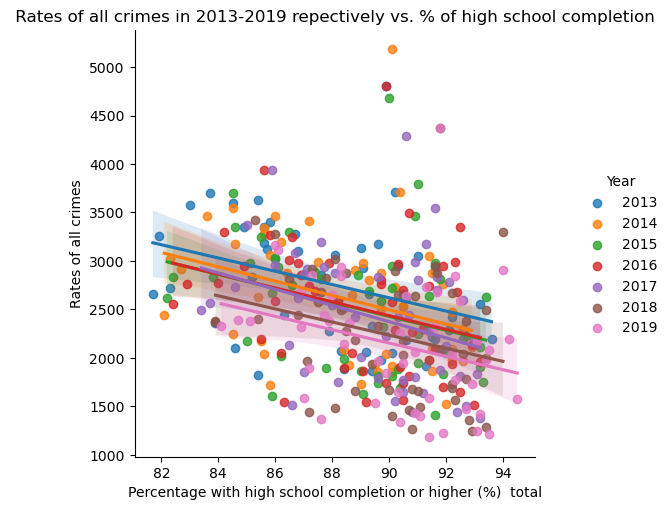

In [15]:
sns.lmplot(x='Percentage with high school completion or higher (%)  total',
           y='Rates of all crimes',hue='Year',data=year_crime,
           fit_reg=True).set(title=' Rates of all crimes in 2013-2019 repectively vs. % of high school completion ')